In [1]:
!pip list

Package           Version
----------------- --------------
asttokens         2.2.1
backcall          0.2.0
Brlapi            0.8.2
certifi           2020.6.20
chardet           4.0.0
comm              0.1.2
cupshelpers       1.0
dbus-python       1.2.16
debugpy           1.6.4
decorator         5.1.1
entrypoints       0.4
executing         1.2.0
feedparser        5.2.1
httplib2          0.18.1
idna              2.10
ipykernel         6.19.2
ipython           8.7.0
jedi              0.18.2
jupyter-client    7.4.8
jupyter-core      5.1.0
louis             3.16.0
matplotlib-inline 0.1.6
musicbrainzngs    0.7.1
mutagen           1.45.1
nest-asyncio      1.5.6
packaging         22.0
parso             0.8.3
pexpect           4.8.0
pickleshare       0.7.5
pip               20.3.4
platformdirs      2.6.0
prompt-toolkit    3.0.36
psutil            5.9.4
ptyprocess        0.7.0
pure-eval         0.2.2
pycairo           1.16.2
pycups            2.0.1
pycurl            7.43.0.6
Pygments          2

In [9]:
# Print iterations progress
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

import time

# A List of Items
items = list(range(0, 57))
l = len(items)

# Initial call to print 0% progress
printProgressBar(0, l, prefix = 'Progress:', suffix = 'Complete', length = 50)
for i, item in enumerate(items):
    # Do stuff...
    time.sleep(0.1)
    # Update Progress Bar
    printProgressBar(i + 1, l, prefix = 'Progress:', suffix = 'Complete', length = 50)

In [1]:
class_list = ['person', 'car']

In [4]:
coco_classes = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
        'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
        'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
        'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
        'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
        'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
        'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
        'hair drier', 'toothbrush']

In [ ]:
def list_exclude(a, b):
    return [element for element in a if element not in b]

class_list = list_exclude(coco_classes, class_list)
class_list

In [2]:
class_list

['person', 'car']

In [ ]:
def list_index_to_exclude(a, b):
    exclude = []
    for each in b:
        print(each)
        for index, element in enumerate(a):
            # print(index, element, sep=': ')
            if each == element:
                exclude.append(str(index))
                break
    return exclude

exclude_list = list_index_to_exclude(coco_classes, class_list)
exclude_list

In [3]:
data_dir = '/home/mosminin/fiftyone/coco_pc'


import fiftyone as fo
import fiftyone.zoo as foz

dataset = foz.load_zoo_dataset(
    "coco-2017",
    splits=["train", "validation"],
    # splits=["validation"],
    # split='train',
    dataset_dir=data_dir,
    dataset_name='coco_pc',
    classes=class_list,
    drop_existing_dataset=True,
    only_matching=True,
    shuffle=True,
    max_samples=1000    
)

# Visualize the dataset in the FiftyOne App
# session = fo.launch_app(dataset)

 100% |██████|    1.9Gb/1.9Gb [26.3s elapsed, 0s remaining, 90.3Mb/s]      
Extracting annotations to '/home/mosminin/fiftyone/coco_pc/raw/instances_train2017.json'
   1% |/-------------|   658/67847 [27.8s elapsed, 47.3m remaining, 23.9 images/s]  


KeyboardInterrupt: 

In [4]:
dataset = fo.load_dataset('coco_not_pv')

In [5]:
dataset

Name:        coco_not_pv
Media type:  image
Num samples: 66808
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)

In [6]:
import fiftyone as fo
export_dir = '/home/mosminin/fiftyone/coco_person_yolo'
label_field = "ground_truth"  # for example
# The splits to export
splits = ['train', 'validation']
# All splits must use the same classes list
classes = class_list
print(classes)

# Export the splits
for split in splits:
    split_view = dataset.match_tags(split)
    split_view.export(
        export_dir=export_dir,
        dataset_type=fo.types.YOLOv5Dataset,
        label_field=label_field,
        split=split,
        classes=classes,
    )

['person']
 100% |█████████████| 64115/64115 [55.2s elapsed, 0s remaining, 1.2K samples/s]      
Directory '/home/mosminin/fiftyone/coco_person_yolo' already exists; export will be merged with existing files
 100% |███████████████| 2693/2693 [2.3s elapsed, 0s remaining, 1.2K samples/s]       


In [13]:
labels_path = '/home/mosminin/fiftyone/coco_person_yolo/labels/'
images_path = '/home/mosminin/fiftyone/coco_person_yolo/images/'

from pathlib import Path
data_type = 'train'
files = Path(f'{labels_path}/{data_type}/').glob('*.txt')
img_path = f'{images_path}/{data_type}'
name_list = list(map(str, files))
print(len(name_list), name_list[:3], sep='\n')

64115
['/home/mosminin/fiftyone/coco_person_yolo/labels/train/000000269997.txt', '/home/mosminin/fiftyone/coco_person_yolo/labels/train/000000500100.txt', '/home/mosminin/fiftyone/coco_person_yolo/labels/train/000000237337.txt']


In [14]:
# importing pandas
import pandas as pd
  
file_list=name_list
l = len(file_list)
  
main_dataframe = pd.DataFrame(pd.read_table(file_list[0], sep='\s+', header = None, engine='python'))

printProgressBar(0, l, prefix = 'Progress:', suffix = 'Complete', length = 50)
  
for i in range(1,len(file_list)):
    data = pd.read_table(file_list[i], sep='\s+', header = None, engine='python')
    df = pd.DataFrame(data) #, columns= ['cls', 'bbox_x', 'bbox_y', 'bbox_w', 'bbox_h']
    main_dataframe = pd.concat([main_dataframe,df],axis=0, ignore_index=True)
    printProgressBar(i + 1, l, prefix = 'Progress:', suffix = 'Complete', length = 50)
    
main_dataframe.columns=['cls', 'x', 'y', 'w', 'h']

compression_opts = dict(method='zip',
                        archive_name='out.csv')  
main_dataframe.to_csv('out.zip', index=False,
          compression=compression_opts)  


Progress: |██████████████████████████████████████████████████| 100.0% Complete


0    262465
Name: cls, dtype: int64


<AxesSubplot: >

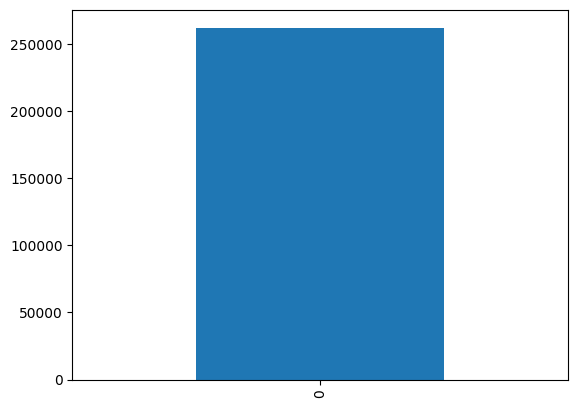

In [15]:
print(main_dataframe['cls'].value_counts(sort=True))
main_dataframe['cls'].value_counts(sort=True).plot(kind='bar')

In [12]:
len(name_list)

2693